# Estimating Causal Effect of Graduate Education on Income
Code authored by: Shawhin Talebi <br />
DoWhy Library: https://microsoft.github.io/dowhy/ <br />
Data from: https://archive.ics.uci.edu/ml/datasets/census+income

### Import libraries

In [1]:
import pickle
import matplotlib.pyplot as plt

import econml
import dowhy
from dowhy import CausalModel

### Load data

In [2]:
df = pickle.load( open( "df_causal_inference.p", "rb" ) )

### Estimating Causal Effects with DoWhy 

Code adopted from: https://microsoft.github.io/dowhy/example_notebooks/dowhy-conditional-treatment-effects.html

#### Define causal model

In [3]:
model=CausalModel(
        data = df,
        treatment= "hasGraduateDegree",
        outcome= "greaterThan50k",
        common_causes="age",
        )

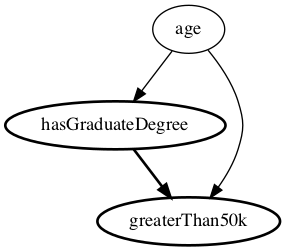

In [4]:
# View model
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

#### Generate estimand i.e. recipe for calculating causal effect

In [5]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                           
────────────────────(Expectation(greaterThan50k|age))
d[hasGraduateDegree]                                 
Estimand assumption 1, Unconfoundedness: If U→{hasGraduateDegree} and U→greaterThan50k then P(greaterThan50k|hasGraduateDegree,age,U) = P(greaterThan50k|hasGraduateDegree,age)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



#### Compute causal effect using metaleaner

In [8]:
identified_estimand_experiment = model.identify_effect(proceed_when_unidentifiable=True)

from sklearn.ensemble import RandomForestRegressor
metalearner_estimate = model.estimate_effect(identified_estimand_experiment,
                                method_name="backdoor.econml.metalearners.TLearner",
                                confidence_intervals=False,
                                method_params={"init_params":{
                                                    'models': RandomForestRegressor()
                                                    },
                                               "fit_params":{}
                                              })
print(metalearner_estimate)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                           
────────────────────(Expectation(greaterThan50k|age))
d[hasGraduateDegree]                                 
Estimand assumption 1, Unconfoundedness: If U→{hasGraduateDegree} and U→greaterThan50k then P(greaterThan50k|hasGraduateDegree,age,U) = P(greaterThan50k|hasGraduateDegree,age)

## Realized estimand
b: greaterThan50k~hasGraduateDegree+age
Target units: ate

## Estimate
Mean value: 0.20340255646236685
Effect estimates: [ 0.31961958  0.20493831  0.35577517 ...  0.15907199 -0.01266913
  0.19505072]



(array([  26.,  105.,   86., 6675., 3008., 5448., 8107., 3156., 2495.,
          64.]),
 array([-0.34271176, -0.24608003, -0.14944829, -0.05281656,  0.04381517,
         0.14044691,  0.23707864,  0.33371037,  0.4303421 ,  0.52697384,
         0.62360557]),
 <BarContainer object of 10 artists>)

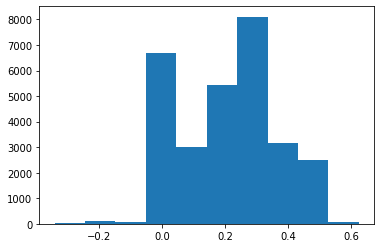

In [9]:
# print histogram of causal effects for each sample
plt.hist(metalearner_estimate.cate_estimates)